# Import the required libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_wine

# Load the dataset

In [12]:
wine = load_wine(as_frame = True)

X = pd.DataFrame(wine.data, columns = wine.feature_names)
y = pd.DataFrame(wine.target)

df = wine.frame

print("The dataset is loaded!.")

The dataset is loaded!.


# Splitting the dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 42)

print("The dataset is splitted among training set ( 80% ) and testing set ( 20% ).")

The dataset is splitted among training set ( 80% ) and testing set ( 20% ).


# Exploratory Data Analysis

In [14]:
print(X.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [15]:
print(X.shape)

(178, 13)


In [16]:
print(X.describe)

<bound method NDFrame.describe of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  

In [17]:
print("Target Names:", wine.target_names)

Target Names: ['class_0' 'class_1' 'class_2']


In [18]:
df['wine_class']=df['target'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})
df=df.drop('target', axis = 1)

In [19]:
print("Dataframe after mapping and dropping target:")
print(df.head())

Dataframe after mapping and dropping target:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of

In [20]:
print(df['wine_class'].value_counts())

wine_class
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64


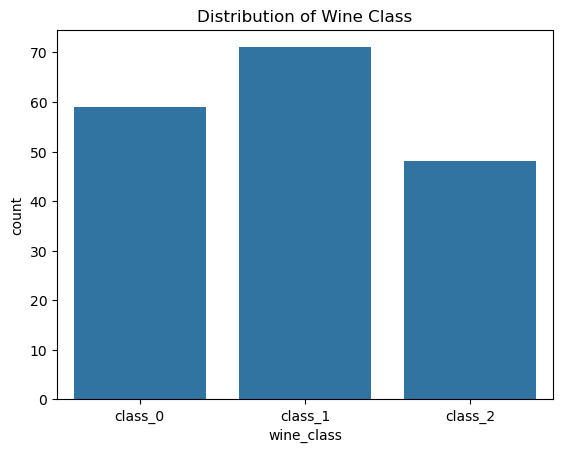

In [21]:
sns.countplot(x='wine_class', data = df)
plt.title("Distribution of Wine Class")
plt.show()

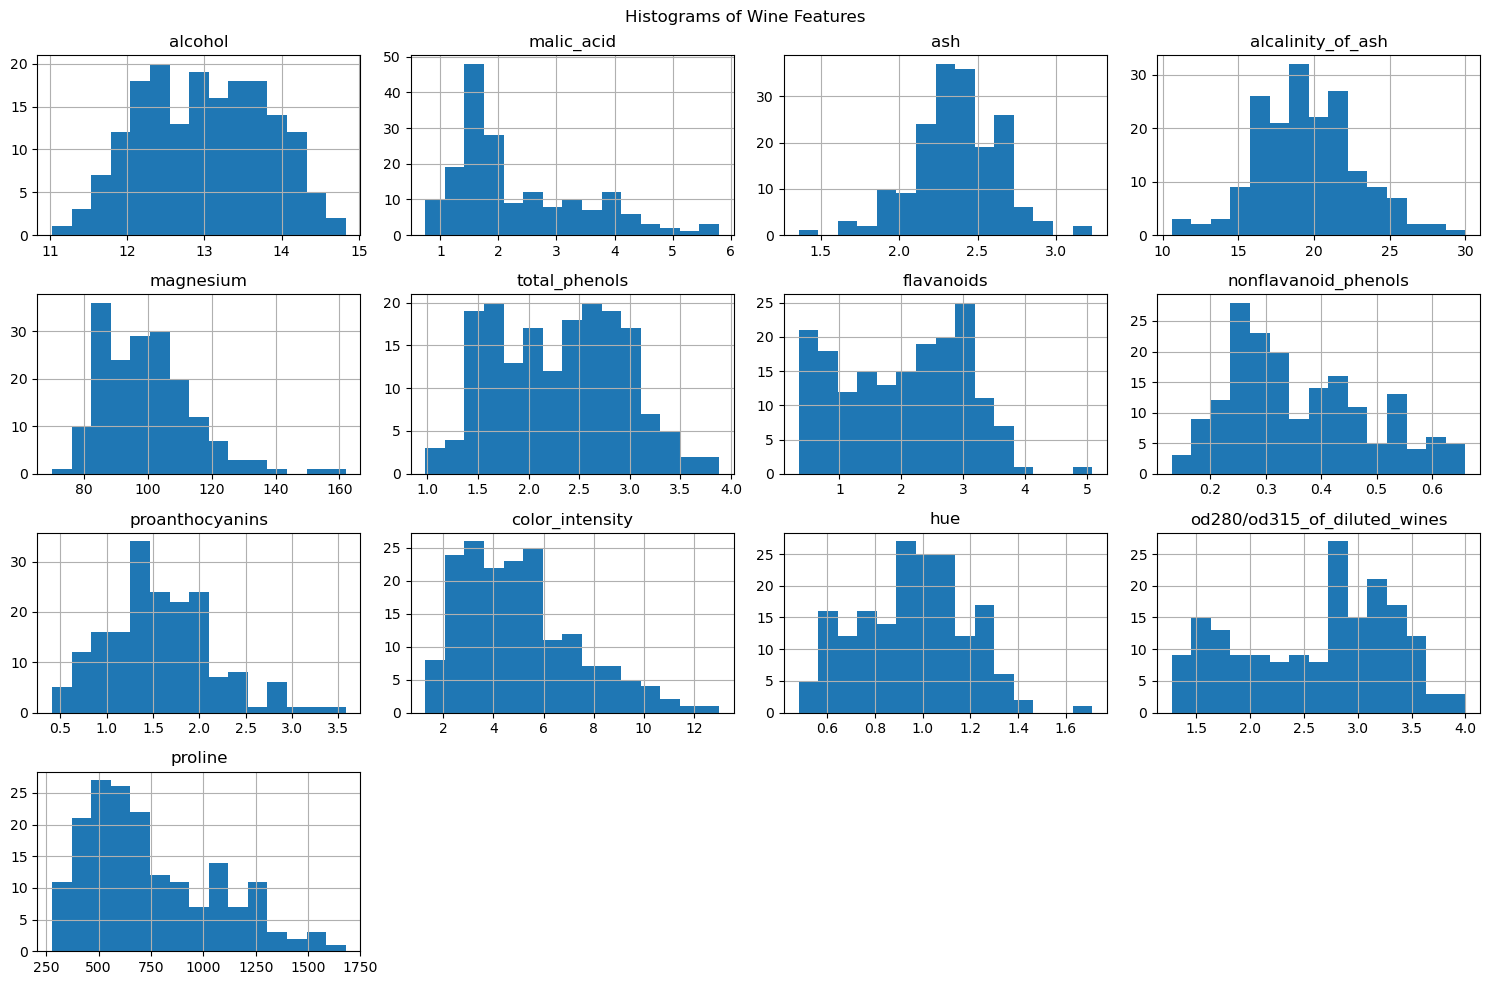

In [24]:
df.hist(bins = 15, figsize = (15,10), layout = (4,4))
plt.suptitle("Histograms of Wine Features")
plt.tight_layout(rect = [0,0,1,1])
plt.show()

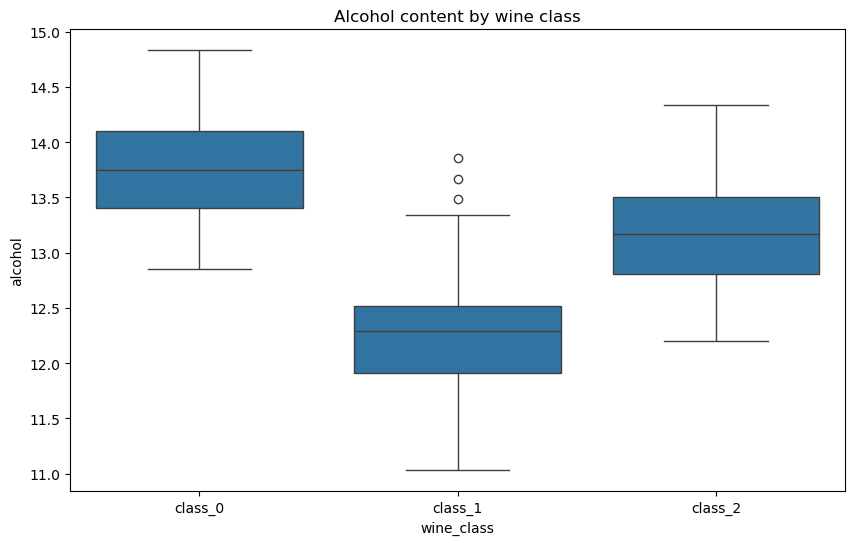

In [25]:
plt.figure(figsize = (10,6))
sns.boxplot(x='wine_class', y = 'alcohol', data = df)
plt.title("Alcohol content by wine class")
plt.show()

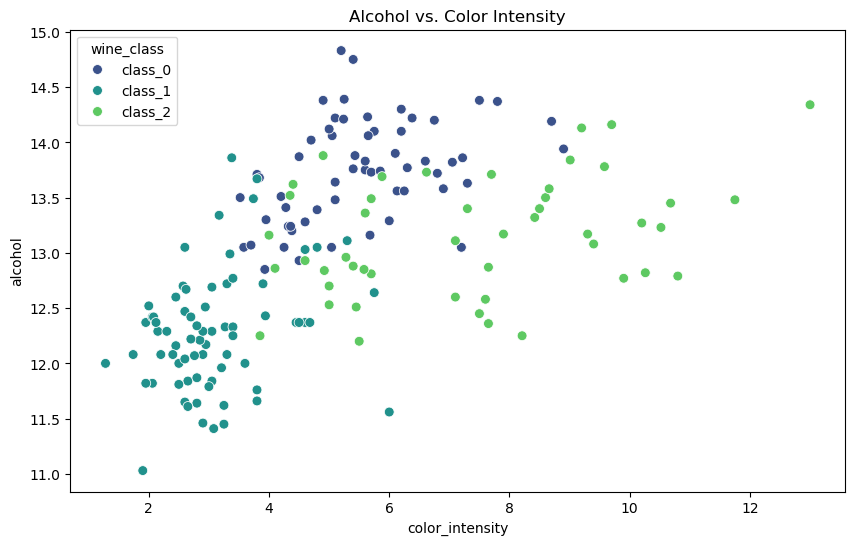

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='color_intensity', y='alcohol', hue='wine_class', data=df, palette='viridis', s=50)
plt.title('Alcohol vs. Color Intensity')
plt.show()

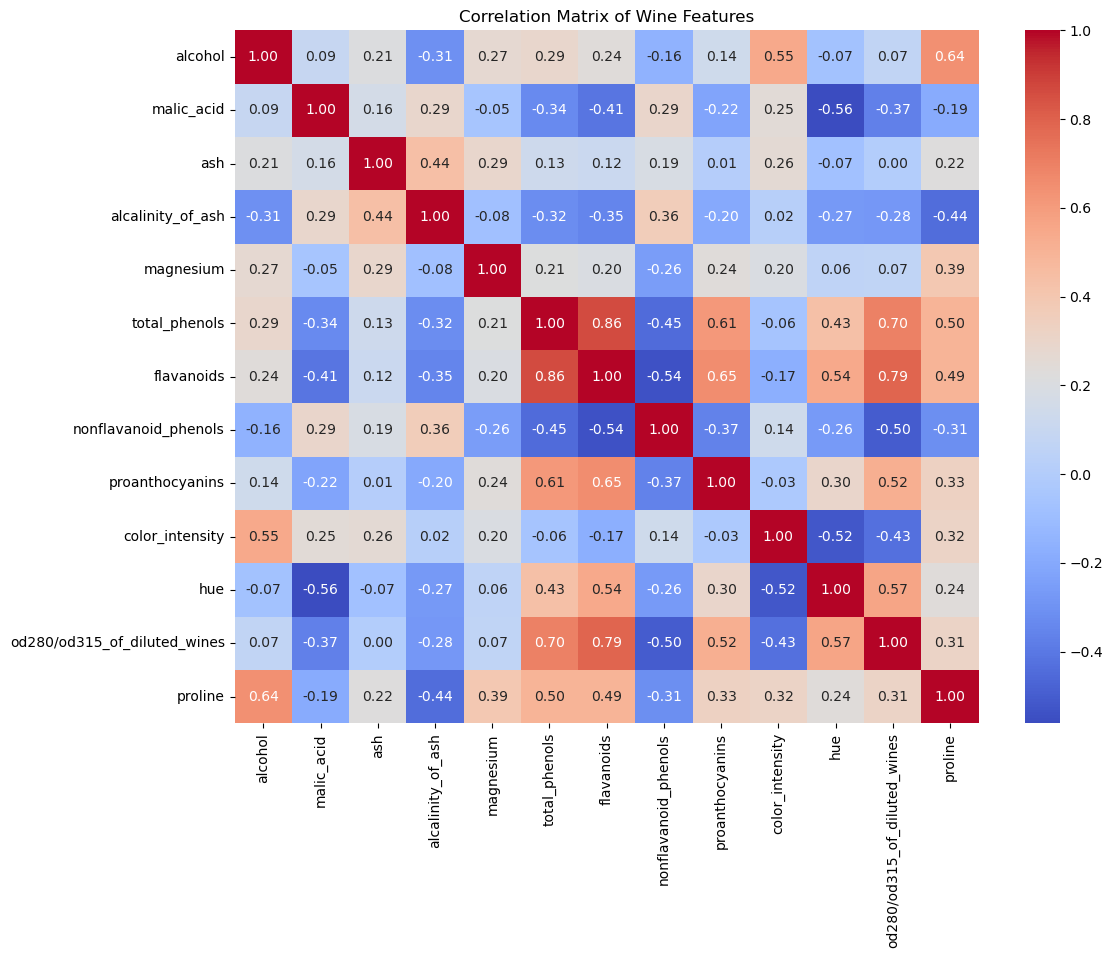

In [27]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Features')
plt.show()

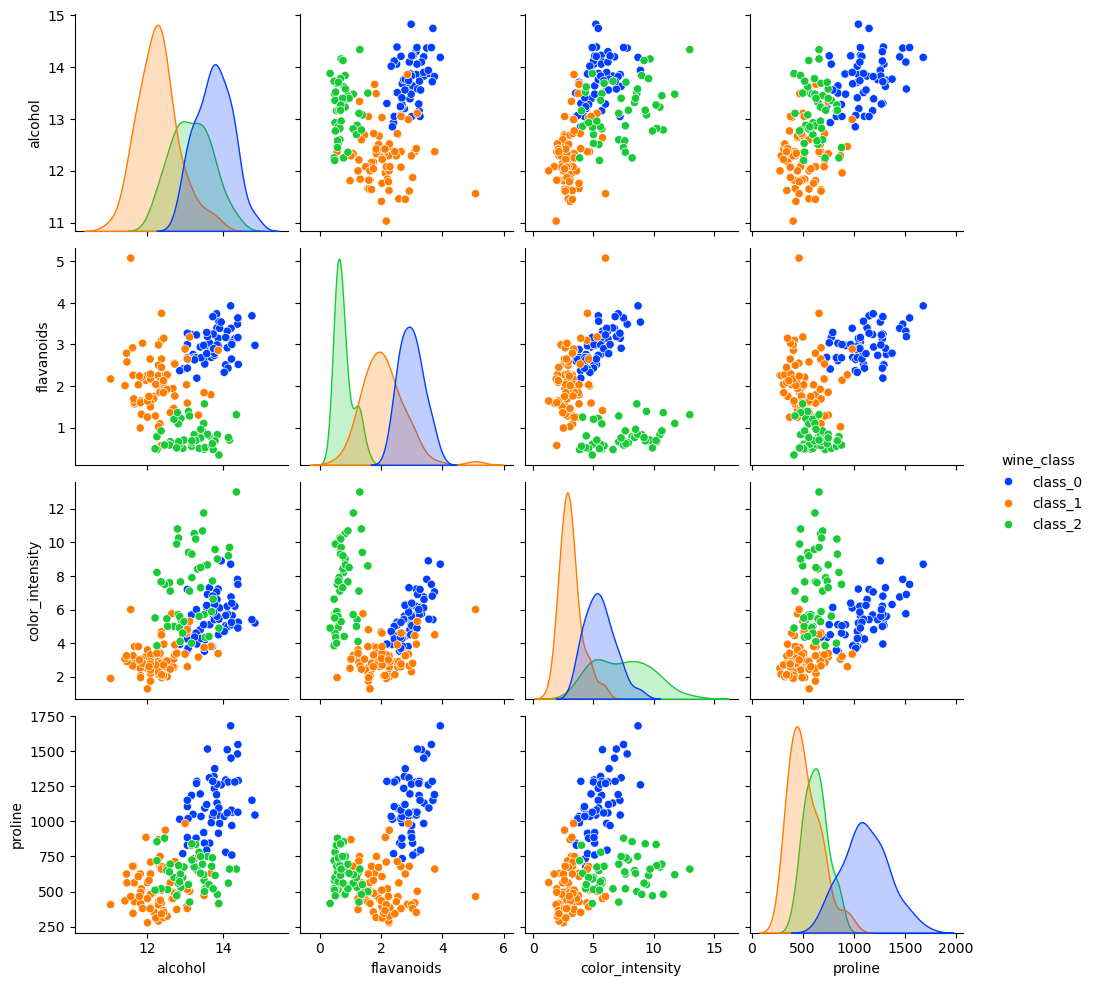

In [28]:
selected_features = ['alcohol', 'flavanoids', 'color_intensity', 'proline', 'wine_class']
sns.pairplot(df[selected_features], hue='wine_class', palette='bright')
plt.show()

# Scaling the dataset

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying the model

In [32]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

pred = svm.predict(X_test_scaled)

print("SVM Model is finally applied!")

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Model is finally applied!


# Evaluating the Model

In [34]:
accuracy = accuracy_score(y_test, pred)

print(f"Accuracy Score of SVM Model: {accuracy:.4f}")

Accuracy Score of SVM Model: 0.9722


In [36]:
print("Classification Report of SVM Model:\n", classification_report(y_test, pred, target_names = wine.target_names))

Classification Report of SVM Model:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



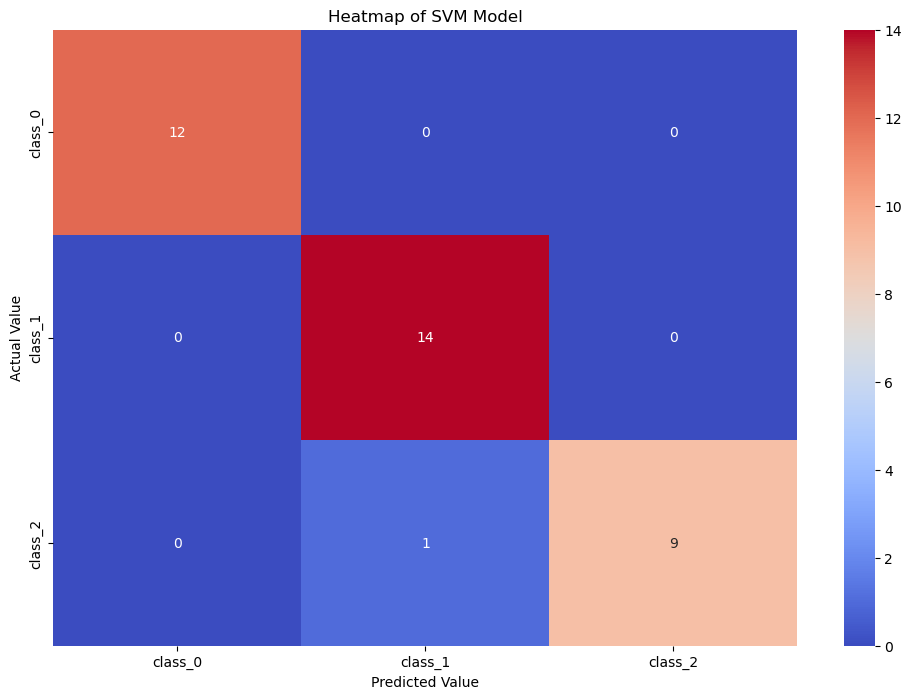

In [37]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize = (12,8))
sns.heatmap(cm, xticklabels = wine.target_names, yticklabels = wine.target_names, cmap ='coolwarm', annot=True)
plt.title("Heatmap of SVM Model")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

plt.show()